In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv');
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your dataframe is named df and contains the diamonds data
# Assuming you want to split 80% for training and 20% for testing
df, test = train_test_split(df, test_size=0.2, random_state=42)

# Save the training and testing dataframes to separate CSV files
df.to_csv('healthcare_stroke_train.csv', index=False)
test.to_csv('healthcare_stroke_test.csv', index=False)

- Gender -> male female
- age
- hypertension -> 0 1 Whether the person has high blood pressure or not
- heart disease -> 0 1 Whether the person has heart disease or not
- ever married -> YES NO
- work type -> private self_employee govt_job ....etc
- Residence_type	-> rural urban
- avg_glucose_level
- bmi -> ratio of mass of the body to square of the height
- smoking_status -> never_smoked smokes ...etc
- stroke -> 0 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 802 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   int64  
 4   heart_disease      4088 non-null   int64  
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                3932 non-null   float64
 10  smoking_status     4088 non-null   object 
 11  stroke             4088 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 415.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
802,4970,79.00,0,0,112.64,28.5,0
3927,56137,62.00,0,0,88.32,36.3,0
2337,54590,21.00,0,0,59.52,33.7,0
3910,36548,31.00,0,0,65.70,30.4,0
1886,61171,31.00,0,0,59.63,19.9,0
...,...,...,...,...,...,...,...
4426,13846,43.00,0,0,88.00,30.6,0
466,1307,61.00,1,0,170.05,60.2,0
3092,31481,1.16,0,0,97.28,17.8,0
3772,61827,80.00,0,0,196.08,31.0,0


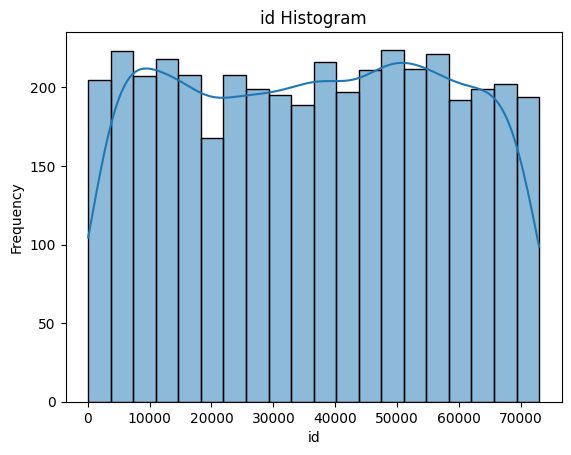

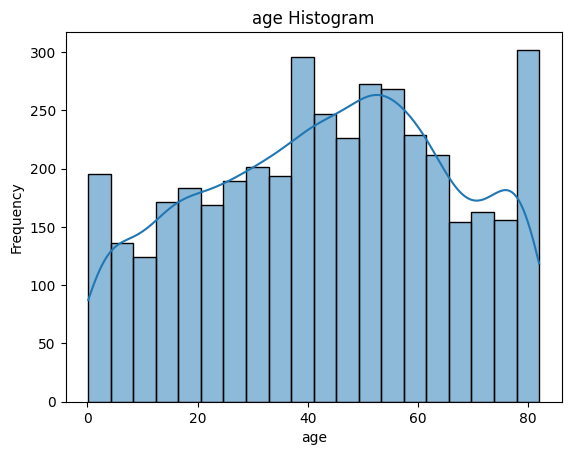

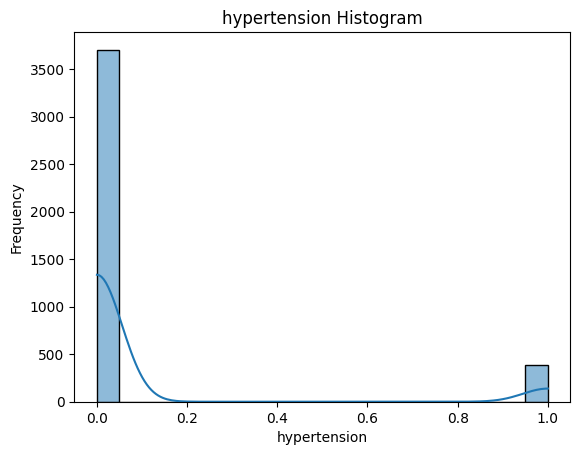

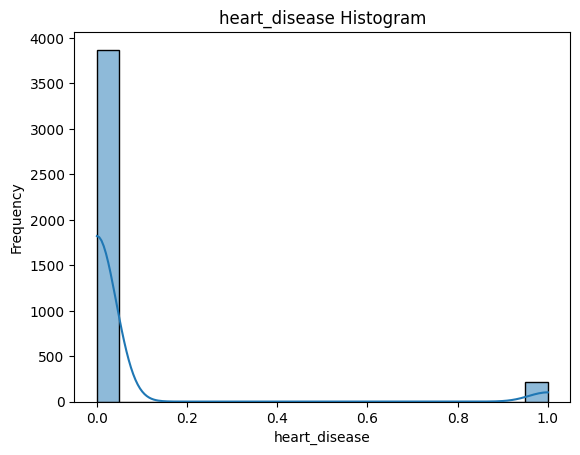

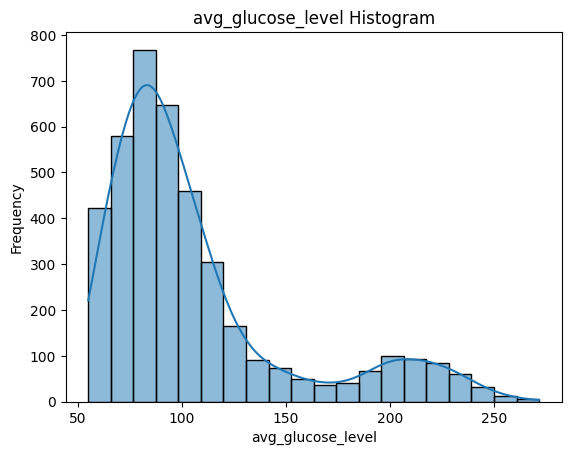

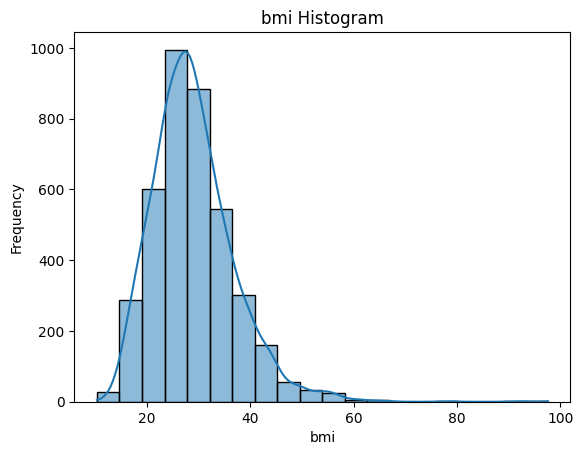

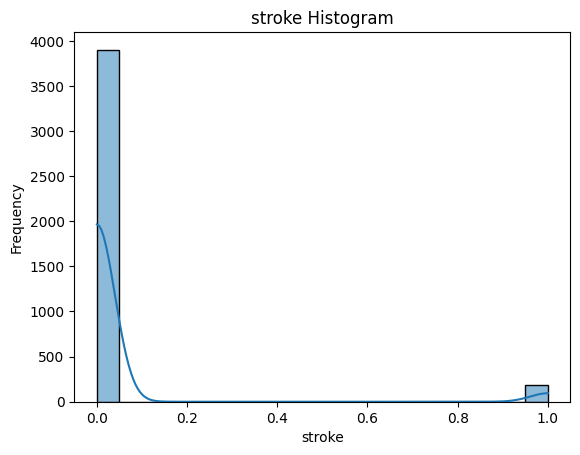

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in numerical_columns :
  sns.histplot(df[i], bins=20, kde=True)
  plt.xlabel(f'{i}')
  plt.ylabel('Frequency')
  plt.title(f'{i} Histogram')
  plt.show()

<Axes: xlabel='age'>

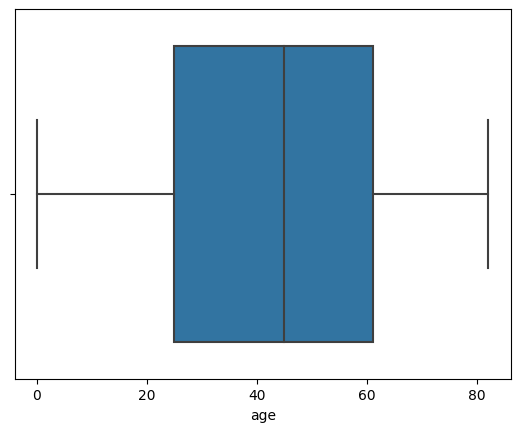

In [ ]:
sns.boxplot(x=df['age'])

<Axes: xlabel='avg_glucose_level'>

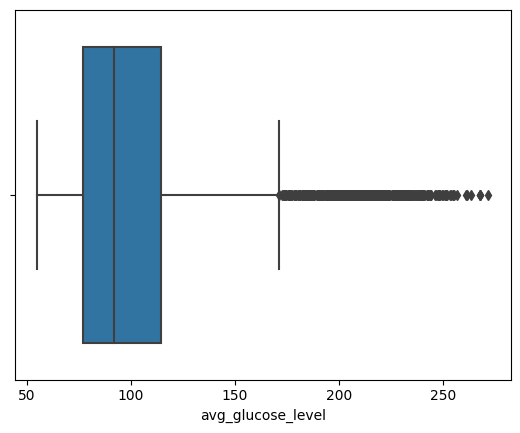

In [ ]:
sns.boxplot(x=df['avg_glucose_level'])

<Axes: xlabel='bmi'>

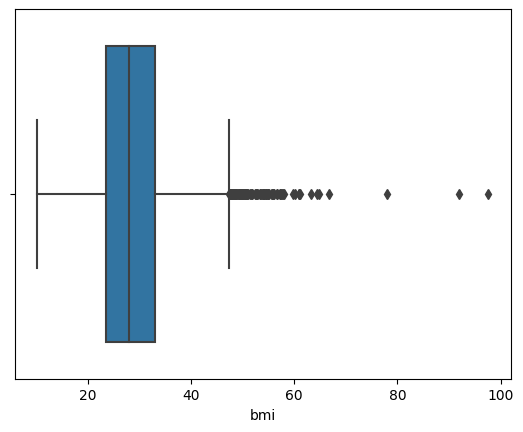

In [ ]:
sns.boxplot(x=df['bmi'])

<Axes: >

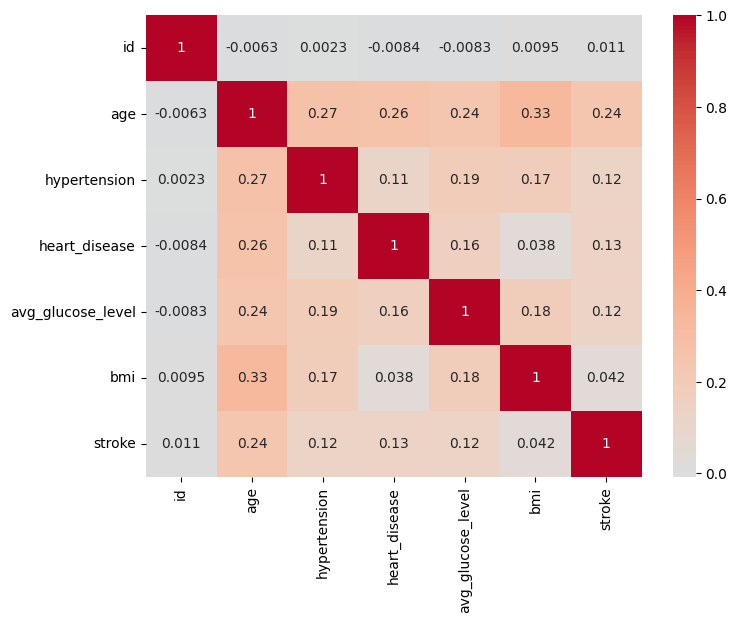

In [ ]:
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

In [ ]:
numerical_columns.head(1)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
802,4970,79.0,0,0,112.64,28.5,0


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
802,Male,Yes,Self-employed,Rural,formerly smoked


In [ ]:
for i in categorical_columns:
    print(f"Value counts for {i}:")
    print(df[i].value_counts())
    print('---' * 10)

Value counts for gender:
Female    2401
Male      1687
Name: gender, dtype: int64
------------------------------
Value counts for ever_married:
Yes    2677
No     1411
Name: ever_married, dtype: int64
------------------------------
Value counts for work_type:
Private          2334
Self-employed     657
children          539
Govt_job          538
Never_worked       20
Name: work_type, dtype: int64
------------------------------
Value counts for Residence_type:
Urban    2091
Rural    1997
Name: Residence_type, dtype: int64
------------------------------
Value counts for smoking_status:
never smoked       1507
Unknown            1233
formerly smoked     712
smokes              636
Name: smoking_status, dtype: int64
------------------------------


In [ ]:
import plotly.express as px
for i in categorical_columns :
  if i != 'stroke' :
    ct = pd.crosstab(df[i], df['stroke'])

    # Reset the index to make 'i' a regular column
    ct.reset_index(inplace=True)

    # Melt the DataFrame to make it suitable for plotting
    melted_ct = pd.melt(ct, id_vars=i, value_vars=[0, 1],
                        var_name='stroke', value_name='Count')

    # Create the interactive bar plot
    fig = px.bar(melted_ct, x=i, y='Count',
                color='stroke', title=f'stroke by {i} ',
                text='Count')

    # Show the plot
    fig.show()
    fig.write_html(f"stroke by {i}.html")

In [ ]:
# stroke with hypertension
ct = pd.crosstab(df['hypertension'], df['stroke'])

# Reset the index to make 'i' a regular column
ct.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for plotting
melted_ct = pd.melt(ct, id_vars='hypertension', value_vars=[0, 1],
                    var_name='stroke', value_name='Count')

# Create the interactive bar plot
fig = px.bar(melted_ct, x='hypertension', y='Count',
            color='stroke', title='stroke by hypertension ',
            text='Count')

# Show the plot
fig.show()
fig.write_html("stroke by hypertension.html")

In [ ]:
## stroke with heart_disease
ct = pd.crosstab(df['heart_disease'], df['stroke'])

# Reset the index to make 'i' a regular column
ct.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for plotting
melted_ct = pd.melt(ct, id_vars='heart_disease', value_vars=[0, 1],
                    var_name='stroke', value_name='Count')

# Create the interactive bar plot
fig = px.bar(melted_ct, x='heart_disease', y='Count',
            color='stroke', title='stroke by heart_disease ',
            text='Count')

# Show the plot
fig.show()
fig.write_html("stroke by heart_disease.html")

In [ ]:
for i in numerical_columns :
  if i != 'hypertension' and i != 'heart_disease' and i != 'id' and i != 'stroke' :
    fig = px.histogram(df, x=i, color="stroke",
                      barmode="overlay", nbins=30,
                      title=f'stroke by {i}')

    # Save the plot to an HTML file
    fig.write_html(f"stroke_by_{i}.html")

    # Show the plot
    fig.show()

- Analysis results  :
  - missing values in bmi -> 201
  - there is no duplicates
  - columns to drop -> id
  - age almost normal distrubuation but there is some problems (there is no outliers)
  - avg_glucose_level almost skewd to the right (there is outliers)
  - bmi has normal distrubution (there is outliers)
  - corr between features is appropriate

- DS -> Classification (supervised)

In [ ]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
802,4970,Male,79.0,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked,0


In [ ]:
df.drop(columns=['Residence_type','id'],inplace=True,axis=1)
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
802,Male,79.0,0,0,Yes,Self-employed,112.64,28.5,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 802 to 860
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   avg_glucose_level  4088 non-null   float64
 7   bmi                3932 non-null   float64
 8   smoking_status     4088 non-null   object 
 9   stroke             4088 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 351.3+ KB


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_median = train_df['bmi'].median()

train_df.fillna(train_median,inplace=True)
test_df.fillna(train_median,inplace=True)

In [ ]:
categorical_columns
# dummies -> gender,ever_married,work_type,smoking_status

,gender,ever_married,work_type,Residence_type,smoking_status
802,Male,Yes,Self-employed,Rural,formerly smoked
3927,Female,Yes,Private,Urban,Unknown
2337,Female,No,Private,Rural,never smoked
3910,Male,Yes,Govt_job,Urban,formerly smoked
1886,Female,No,Private,Rural,never smoked
...,...,...,...,...,...
4426,Male,Yes,Govt_job,Rural,never smoked
466,Female,Yes,Private,Rural,smokes
3092,Female,No,children,Urban,Unknown
3772,Male,Yes,Self-employed,Rural,formerly smoked


In [ ]:
train_df['work_type'].unique()

array(['Private', 'children', 'Govt_job', 'Self-employed', 'Never_worked'],
      dtype=object)

In [ ]:
dummy_cols = ['gender','ever_married','work_type']
# Apply one-hot encoding to training set
train_df_onehot = pd.get_dummies(train_df, columns=dummy_cols)

# Apply one-hot encoding to test set
test_df_onehot = pd.get_dummies(test_df, columns=dummy_cols)

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'Unknown', 'never smoked', 'smokes'],
      dtype=object)

In [ ]:
smoking_mapping = {
    'Unknown':0,
    'never smoked':1,
    'formerly smoked': 2,
    'smokes':3
}

train_df_onehot['smoking_status'] = train_df_onehot['smoking_status'].map(smoking_mapping)
test_df_onehot['smoking_status'] = test_df_onehot['smoking_status'].map(smoking_mapping)
test_df_onehot

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2123,25.00,0,0,134.33,19.5,0,0,1,0,1,0,0,0,1,0,0
103,81.00,0,1,78.70,19.4,0,1,1,0,0,1,0,0,0,1,0
4149,81.00,1,1,59.11,20.7,2,0,1,0,0,1,0,0,0,1,0
4172,14.00,0,0,60.70,18.6,0,0,0,1,1,0,0,0,0,0,1
3201,80.00,0,0,94.96,22.1,2,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,1.64,0,0,56.21,19.0,0,0,0,1,1,0,0,0,0,0,1
2118,36.00,1,0,113.05,31.0,3,0,0,1,1,0,1,0,0,0,0
3289,44.00,0,0,86.15,21.3,1,0,1,0,0,1,0,0,1,0,0
2443,13.00,0,0,116.64,23.9,0,0,0,1,1,0,0,0,0,0,1


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit the MinMaxScaler on 'age', 'avg_glucose', and 'bmi'
# scaler.fit(train_df_onehot[['age', 'avg_glucose_level', 'bmi']])

# # Perform min-max scaling on 'age', 'avg_glucose', and 'bmi'
# train_df_onehot[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(train_df_onehot[['age', 'avg_glucose_level', 'bmi']])
# test_df_onehot[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(test_df_onehot[['age', 'avg_glucose_level', 'bmi']])

In [ ]:
train_df_onehot

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
4697,67.0,0,0,86.96,31.4,2,0,0,1,0,1,0,0,1,0,0
2946,9.0,0,0,90.22,18.7,0,0,1,0,1,0,0,0,0,0,1
250,58.0,1,0,87.96,39.2,1,0,0,1,0,1,0,0,1,0,0
4197,53.0,0,1,95.23,35.2,3,0,0,1,0,1,0,0,1,0,0
4561,65.0,0,1,57.52,28.0,2,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,24.0,0,0,83.10,42.5,3,0,1,0,0,1,1,0,0,0,0
4990,4.0,0,0,85.88,17.7,0,0,0,1,1,0,0,0,0,0,1
1498,38.0,0,0,86.86,36.5,0,0,0,1,1,0,0,0,1,0,0
2779,6.0,0,0,84.10,19.8,0,0,1,0,1,0,0,0,0,0,1


In [ ]:
test_df_onehot

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2123,25.00,0,0,134.33,19.5,0,0,1,0,1,0,0,0,1,0,0
103,81.00,0,1,78.70,19.4,0,1,1,0,0,1,0,0,0,1,0
4149,81.00,1,1,59.11,20.7,2,0,1,0,0,1,0,0,0,1,0
4172,14.00,0,0,60.70,18.6,0,0,0,1,1,0,0,0,0,0,1
3201,80.00,0,0,94.96,22.1,2,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,1.64,0,0,56.21,19.0,0,0,0,1,1,0,0,0,0,0,1
2118,36.00,1,0,113.05,31.0,3,0,0,1,1,0,1,0,0,0,0
3289,44.00,0,0,86.15,21.3,1,0,1,0,0,1,0,0,1,0,0
2443,13.00,0,0,116.64,23.9,0,0,0,1,1,0,0,0,0,0,1


In [ ]:
X_train = train_df_onehot.drop('stroke',axis=1)
y_train = train_df_onehot['stroke']

X_test = test_df_onehot.drop('stroke',axis=1)
y_test = test_df_onehot['stroke']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, recall_score

In [ ]:
logistic_model = LogisticRegression()
svc_model = SVC()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()

In [ ]:
logistic_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GaussianNB()

In [ ]:
y_pred_logistic = logistic_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

In [ ]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Print the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_logistic)
print("\nConfusion Matrix for Support Vector Classifier:")
print(confusion_matrix_svc)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(confusion_matrix_decision_tree)
print("\nConfusion Matrix for KNN Classifier:")
print(confusion_matrix_knn)
print("\nConfusion Matrix for Naive Bayes:")
print(confusion_matrix_naive_bayes)

Confusion Matrix for Logistic Regression:
[[780   0]
 [ 38   0]]

Confusion Matrix for Support Vector Classifier:
[[780   0]
 [ 38   0]]

Confusion Matrix for Decision Tree Classifier:
[[745  35]
 [ 31   7]]

Confusion Matrix for KNN Classifier:
[[773   7]
 [ 38   0]]

Confusion Matrix for Naive Bayes:
[[375 405]
 [  5  33]]


In [ ]:
logistic_recall = recall_score(y_test, y_pred_logistic)
svc_recall = recall_score(y_test, y_pred_svc)
decision_tree_recall = recall_score(y_test, y_pred_decision_tree)
knn_recall = recall_score(y_test, y_pred_knn)
naive_bayes_recall = recall_score(y_test, y_pred_naive_bayes)

# Print recall scores
print("Logistic Regression Recall:", logistic_recall)
print("SVC Recall:", svc_recall)
print("Decision Tree Recall:", decision_tree_recall)
print("KNN Recall:", knn_recall)
print("Naive Bayes Recall:", naive_bayes_recall)

Logistic Regression Recall: 0.0
SVC Recall: 0.0
Decision Tree Recall: 0.18421052631578946
KNN Recall: 0.0
Naive Bayes Recall: 0.868421052631579


In [ ]:
# BEST model is naive bayes...
# tuning

In [ ]:
help(naive_bayes_model)

Help on GaussianNB in module sklearn.naive_bayes object:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB).
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classes. If specified, the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 | 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create a dictionary containing the candidate values of var_smoothing
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]  # Example candidate values
}

# Create a GridSearchCV object
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)

# Fit the model for grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best estimator
best_model = grid_search.best_estimator_

# Now you can use best_model to make predictions

Best Parameters: {'var_smoothing': 1e-06}
Best Score: 0.7617737003058105


In [ ]:
bmi_median = df['bmi'].median()
df.fillna(bmi_median,inplace=True)

dummy_cols = ['gender','ever_married','work_type']
df = pd.get_dummies(df, columns=dummy_cols)

smoking_mapping = {
    'Unknown':0,
    'never smoked':1,
    'formerly smoked': 2,
    'smokes':3
}

df['smoking_status'] = df['smoking_status'].map(smoking_mapping)

